# Asignaciones de zona a partir de un solo CSV

Este codigo fue realizado en base a la documentación oficial de ESRI, sin embargo, algunos parámetros fueron ajustados por el usuario 


José Córdova-Fredes, Geógrafo de la Pontificia Universidad Católica de Chile.




El objetivo de este Notebook es lograr las asignaciones masivas desde un solo CSV que contengan todo los datos de asignaciones; entonces dicho lo anterior, la asignaciones se haran desde las zonas  y no desde el usuario.


En este caso especifico la dirección esta en el siguiente formato: "Latitud y Longitud", es decir, la geometria de la localización esta dada por un tipo de formato x e y.



Para cualquier duda con gusto ayudare, favor comunicarse a jcordovafredes@outlook.com



# Importar librerias

Se importan las librerias que sean necesarias para correr el script,por una cosa de orden se sugiere que vaya todo al principio

In [1]:
import datetime
import json
import arcgis
from arcgis.gis import GIS
from arcgis.geometry import Geometry
from arcgis.apps import workforce

# Conectando organización

Es importante conectar el servidor (url) con el usuario respectivo del portal

In [39]:
gis = GIS("https://fau-uchile.maps.arcgis.com/", "jicoardova_fau")

Enter password: ········


# Workforce vacio

Es importante y relevante empezar con un proyecto vacio, esto es de suma importancia, puesto que es posible que no funcione y arroje errores.

In [40]:
item = gis.content.get("ab2ac4e09a3e4fe8abff88eeeab7c3e8")
project = workforce.Project(item)
project

<Project La Ligua>

# Se Agregan Trabajadores

En este apartado es relevante crear un grupo exclusivo para trabajadores e incorporar a los usuarios "trabajadores"

In [41]:
trabajadores = gis.groups.get("5573ec020617466288bd149990d1ace0")
trabajadores

<Group title:"Trabajadores" owner:jicoardova_fau>

In [42]:
for username in trabajadores.get_members()["users"]:
    user = gis.users.get(username)
    project.workers.add(
        user_id=username,
        name=user.fullName,
        status="not_working",
        title="Trabajador de campo"
    )

# Se agregan los supervisores

En este apartado es relevante crear un grupo exclusivo para Supervisores y asi incorporarlos

<Group title:"Supervisores" owner:jicoardova_fau>
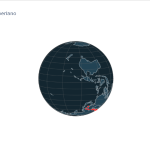

In [43]:
supervisores_grifos = gis.groups.get("be5f84c01c2d404ca78ec97ad5c17ee0")
supervisores_grifos

In [44]:
for username in supervisores_grifos.get_members()["users"]:
    if username != "jicoardova_fau":
        user = gis.users.get(username)
        project.dispatchers.add(
            user_id=username,
            name=user.fullName
        )

# Agregar integracion de explorer

Básicamente se agrega un mapa con toda la información de capas llamese puntos, lineas y poligonos, esto es relevante para darle contexto a la futura asignación

In [45]:
from arcgis.apps import build_explorer_url
from arcgis.mapping import WebMap

webmap = WebMap(gis.content.get("cbcbc17fdbff4e3697300d585366b817"))
webmap.item.share(groups=[project.group])
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [46]:
url = build_explorer_url(
    webmap=webmap,
    center="${assignment.latitude},${assignment.longitude}",
    url_type="App",
    scale=9000
)

In [47]:
project.integrations.add("default-explorer", "Explorer At Assignment", url)

<Integration default-explorer>

# Conectar y leer csv

Es importante que antes de cargar un csv, se instala e importe la libreria Pandas, esta importación puede ir al principio: en cosa de gusto no hay nada escrito

In [48]:
import pandas as pd

En cuanto al como cargar un archivos csv, depende de cada configuración; en mi caso es relevante colocar la f antes de la dirección de la carpeta donde contiene el archivo csv y uso /.


En esta parte hay que presta atención en las coordenadas, solo debe haber una coma y esta debe estar en el lugar adecuado.

In [57]:
assignments = f'C:/Users/jcord/OneDrive/Escritorio/XYGO/Scripts/geo.csv'
df = pd.read_csv(assignments, sep=";")
df

,OBJECTID,LON,LAT,ID_INSPECC,LOCALIDAD,Description,Assigned,Due Date,ANIO,ID_PERIODO,NOMBRE_PER,ID_SIGEC,UBICACION,UBICACION_,FREC_INSPE,ID_ZONA,NOMBRE_ZON,GlobalID
0,1,"289997,1297895","6407308,10134821",517693606,LA LIGUA,Zona 1: Colo Colo,andraes.smgo_fau,30/8/2021 00:00,,1880,,3660980,MATRIZ,,ANUAL,,SZQ,{B6C66A13-575D-4287-8BE9-8E6661207723}
1,2,"285936,270039269","6407640,74213531",1740157,PLACILLA DE LA LIGUA,Zona 1: Colo Colo,andraes.smgo_fau,31/8/2021 00:00,,11,,3111619,VALVULA DE CORTA,,ANUAL,,,{4AF31C08-62BB-4464-865C-421DD15216AA}
2,3,"290082,579072391","6407579,94858063",1740610,LA LIGUA,Zona 1: Colo Colo,andraes.smgo_fau,1/9/2021 00:00,,11,,3111539,VALVULA DE CORTA,,ANUAL,,,{0D2322C0-B8BF-4E13-AEA7-0DDDA0D5D506}
3,4,"282361,973031008","6407836,38808715",555648402,PLACILLA DE LA LIGUA,Zona 1: Colo Colo,andraes.smgo_fau,2/9/2021 00:00,,263,SIN INFORMACION,3671960,MATRIZ,,ANUAL,,SZQ,{0FB3AB4F-8D67-4576-A645-0E652BEDFC2A}
4,5,"284688,680936409","6407518,0286102",781114000,PLACILLA DE LA LIGUA,Zona 1: Colo Colo,andraes.smgo_fau,3/9/2021 00:00,,4025,,3753220,MATRIZ,,ANUAL,,,{A957D082-CB24-4D51-BB27-2CCEEE883F0B}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,"290245,980444421","6407015,60103074",522065824,LA LIGUA,Zona 3: Naval,INTERGEO_06,27/7/2022 00:00,,361,IN-1579,3663624,VALVULA REGULADORA,,ANUAL,,SZQ,{78408394-1722-45AB-9F76-47556195CBED}
332,333,"289501,933501462","6406741,84743954",457673408,LA LIGUA,Zona 3: Naval,INTERGEO_06,28/7/2022 00:00,,8329,EXTAP_75086_41_13,3650660,MATRIZ,,ANUAL,,SZQ,{47225AC7-1813-4081-A775-D95DCDA3DDDD}
333,334,"285842,035976273","6407542,76538621",332543024,PLACILLA DE LA LIGUA,Zona 3: Naval,INTERGEO_06,29/7/2022 00:00,,19,174-11- OQ,3623622,MATRIZ,,ANUAL,,SZQ,{762A362C-F8A1-4D9B-8F78-D1A374A708FB}
334,335,"285649,498862343","6407577,41379998",332543025,PLACILLA DE LA LIGUA,Zona 3: Naval,INTERGEO_06,30/7/2022 00:00,,19,174-11- OQ,3623624,MATRIZ,,ANUAL,,SZQ,{EF4C37FD-63FE-4A16-9A77-4ACEDAB1A939}


# Asignar a los trabajadores

Aca se busca crear una variable especifica con los nombres, que ya ingresemos anteriormente en el "Grupo de Trabajadores", este paso es relevante dado que le estamos diciendo mediante código que cierto usuarios tienen un ID especifico por ArcGIS(nombre de usuario).

In [50]:
Andres = project.workers.get(user_id="andraes.smgo_fau")
Daniela = project.workers.get(user_id="INTERGEO_04")
Felipe = project.workers.get(user_id="INTERGEO_06")

# Mapear la descripción para cada trabajador

Esta parte es relevante porque le damos una descripción especifica, en este caso le decimos que queremos tener una asignación de descripción especifica, que este asociada a un usuario especifico. Si bien esto se indica en el csv, es relevante que en el código se espcifica, sin esto lamentablemente la asignación por zona seria imposible de realizar.

In [51]:
description_to_worker ={
    'Zona 1: Colo Colo': Andres,
    'Zona 2: San Luis': Daniela,
    'Zona 3: Naval': Felipe
}

# Se crea la asignación

La asignación o asignaciones se crean, si bien es relevante hacerla en algún momento antes de las asignaciones puntuales, ya sea a zonas o usuarios, para este caso se creo las asignaciones en este momento, puede ir antes, no hay problema con eso, igual es importante que no exista una duplicidad de asignaciones.

In [52]:
assignment_types = project.assignment_types.add(name="Inspección de Grifo")

# Crear una asignación para cada fila

1. Para cada asignación, primero codifique geográficamente la dirección para obtener la ubicación x, y (en este caso la ubicación esta determinada por longitud y latitud) en WGS84 Web Mercator de la asignación. 

 Luego proporcione atributos adicionales

2. Finalmente, use el método batch_add para agregar múltiples asignaciones a la vez (esto es más rápido que usar el método add ya que la validación se realiza una vez para todas las asignaciones)

In [53]:
from arcgis.geocoding import geocode
from datetime import datetime

### 1. Asignación para todas las zonas

Aca se realiza las asignaciones para cada zonas y con los parametros que se definen en el csv

In [66]:
assignments = []
for index, row in df.iterrows():
    geometry = {
        "x": row["LON"].replace(",", "."),
        "y": row["LAT"].replace(",", "."),
        "spatialReference": {
            "wkid": 32719,
            "latestWkid": 32719
        }
    }
    assignments.append(
        workforce.Assignment(
            project,
            geometry=geometry,
            location=row["LOCALIDAD"],
            description=row["Description"],
            priority=1,
            assignment_type="Inspección de Grifo",
            #Cambiar el estado a asignado
            status="assigned",
            worker=description_to_worker[row["Description"].strip()],
            due_date=pd.to_datetime(row["Due Date"])
        )
    )

In [67]:
#Agregar asignaciones con el metodo batch_add
project.assignments.batch_add(assignments)

[<Assignment 337>,
 <Assignment 338>,
 <Assignment 339>,
 <Assignment 340>,
 <Assignment 341>,
 <Assignment 342>,
 <Assignment 343>,
 <Assignment 344>,
 <Assignment 345>,
 <Assignment 346>,
 <Assignment 347>,
 <Assignment 348>,
 <Assignment 349>,
 <Assignment 350>,
 <Assignment 351>,
 <Assignment 352>,
 <Assignment 353>,
 <Assignment 354>,
 <Assignment 355>,
 <Assignment 356>,
 <Assignment 357>,
 <Assignment 358>,
 <Assignment 359>,
 <Assignment 360>,
 <Assignment 361>,
 <Assignment 362>,
 <Assignment 363>,
 <Assignment 364>,
 <Assignment 365>,
 <Assignment 366>,
 <Assignment 367>,
 <Assignment 368>,
 <Assignment 369>,
 <Assignment 370>,
 <Assignment 371>,
 <Assignment 372>,
 <Assignment 373>,
 <Assignment 374>,
 <Assignment 375>,
 <Assignment 376>,
 <Assignment 377>,
 <Assignment 378>,
 <Assignment 379>,
 <Assignment 380>,
 <Assignment 381>,
 <Assignment 382>,
 <Assignment 383>,
 <Assignment 384>,
 <Assignment 385>,
 <Assignment 386>,
 <Assignment 387>,
 <Assignment 388>,
 <Assignment

# Borrar asignaciones

Solamente es posible borrar asignaciones que ya esten asignadas, valga la redundancia

In [60]:
project.assignments.batch_delete(assignments)

# Actualizar asignaciones

Para actualizar la asignaciones se ocupa el metodo batch update.

In [ ]:
project.assignments.batch_update(assignments)

# Se visualizan la cantidad de asignaciones realizadas

In [61]:
#Buscar todas las asignaciones
assignments = project.assignments.search()
assignments

[]

# Descripción de las asignaciones

Este apartado brinda información de sintesis, en este caso para cada zona.

In [68]:
assignment = assignments[0]
print(f"Status: {assignment.status}")
print(f"Description: {assignment.description}")
print(f"Priority: {assignment.priority}")
print(f"Assigned To: {assignment.worker}")
print(f"Type: {assignment.assignment_type}")
print(f"Due Date: {assignment.due_date}")

Status: assigned
Description: Zona 1: Colo Colo
Priority: low
Assigned To: Andrés San Martin (andraes.smgo_fau)
Type: Inspección de Grifo
Due Date: 2021-08-30 00:00:00+00:00


# Verificar asignaciones en el mapa

Acá se presenta las asignaciones hecha anteriormente en un mapa, es importante indicar que este información en el mapa es lo mismo que se puede visualizar en el respectivo workforce.

In [69]:
webmap = gis.map("La Ligua", zoomlevel=12)
webmap.add_layer(project.assignments_layer)
webmap

MapView(layout=Layout(height='400px', width='100%'))